In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
from xgboost.sklearn import XGBRegressor

In [5]:
#loading the datafile as a csv
file_id = 'https://drive.google.com/uc?id=1ncNWEOfOmPa-hAQCNz1H75Mn5ZGrakcf'
data = pd.read_csv(file_id)

In [6]:
data.head(3) #index needs changing

,name,gdp,gdp_per_capita,gdp_growth,fertility,infant_mortality,sex_ratio,population,pop_growth,pop_density,...,region_Northern Europe,region_Oceania,region_South America,region_South-Eastern Asia,region_Southern Africa,region_Southern Asia,region_Southern Europe,region_Western Africa,region_Western Asia,region_Western Europe
0,Afghanistan,-0.233153,-0.595869,-1.578889,1.485904,1.486176,0.145774,-0.027865,1.100765,-0.143343,...,0,0,0,0,0,1,0,0,0,0
1,Albania,-0.235986,-0.418838,0.254261,-0.836024,-0.681715,0.068196,-0.263291,-1.220468,-0.121318,...,0,0,0,0,0,0,1,0,0,0
2,Algeria,-0.153553,-0.460865,-0.599102,0.247543,-0.026883,-0.004818,0.004285,0.654374,-0.163329,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data.set_index('name', inplace=True)
data.head(3)

,gdp,gdp_per_capita,gdp_growth,fertility,infant_mortality,sex_ratio,population,pop_growth,pop_density,urban_population,...,region_Northern Europe,region_Oceania,region_South America,region_South-Eastern Asia,region_Southern Africa,region_Southern Asia,region_Southern Europe,region_Western Africa,region_Western Asia,region_Western Europe
name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,-0.233153,-0.595869,-1.578889,1.485904,1.486176,0.145774,-0.027865,1.100765,-0.143343,-1.509992,...,0,0,0,0,0,1,0,0,0,0
Albania,-0.235986,-0.418838,0.254261,-0.836024,-0.681715,0.068196,-0.263291,-1.220468,-0.121318,0.064323,...,0,0,0,0,0,0,1,0,0,0
Algeria,-0.153553,-0.460865,-0.599102,0.247543,-0.026883,-0.004818,0.004285,0.654374,-0.163329,0.597989,...,0,0,0,0,0,0,0,0,0,0


In [8]:
data.columns

Index(['gdp', 'gdp_per_capita', 'gdp_growth', 'fertility', 'infant_mortality',
       'sex_ratio', 'population', 'pop_growth', 'pop_density',
       'urban_population', 'urban_population_growth', 'imports', 'exports',
       'unemployment', 'employment_industry', 'employment_agriculture',
       'employment_services', 'tourists', 'surface_area', 'forested_area',
       'internet_users', 'homicide_rate', 'refugees', 'threatened_species',
       'co2_emissions', 'life_expectancy_avg', 'primary_school_enrollment_avg',
       'secondary_school_enrollment_avg', 'post_secondary_enrollment_avg',
       'region_Central America', 'region_Central Asia',
       'region_Eastern Africa', 'region_Eastern Asia', 'region_Eastern Europe',
       'region_Middle Africa', 'region_Northern Africa',
       'region_Northern America', 'region_Northern Europe', 'region_Oceania',
       'region_South America', 'region_South-Eastern Asia',
       'region_Southern Africa', 'region_Southern Asia',
       'region_S

**TRAIN AND TEST SPLIT**

In [9]:
data.shape

(179, 47)

In [10]:
# Split the data into features (X) and target (y)
X = data.drop(columns=['life_expectancy_avg'])  # Features
y = data['life_expectancy_avg']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} rows")
print(f"Testing set size: {X_test.shape[0]} rows")

Training set size: 143 rows
Testing set size: 36 rows


# **STARTING WITH THE MODELING PROCESS**

1. **Linear Regression Model**

In [11]:
# Initialize and train the Multiple Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model's performance
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

# Display evaluation metrics for Linear Regression
print(f"Mean Squared Error (MSE): {mse_lr}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr}")
print(f"R-Squared (R²): {r2_lr}")

Mean Squared Error (MSE): 0.20093043031127414
Root Mean Squared Error (RMSE): 0.4482526411648616
R-Squared (R²): 0.8543317381885187


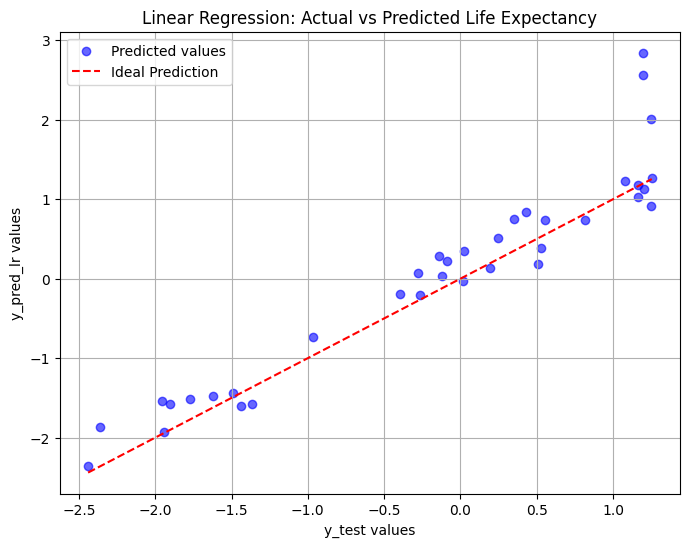

In [12]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.6, label="Predicted values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Ideal Prediction")
plt.xlabel('y_test values')
plt.ylabel('y_pred_lr values')
plt.title('Linear Regression: Actual vs Predicted Life Expectancy')
plt.legend()
plt.grid(True)
plt.show()


As can be inferred from the R², 85% of the data variability can be explained by the regression model. RMSE of 0.44 also indicated a good fit (however, not a great fit).

From the graph also, some of the points on the top right seem to be not in line with the regression model.

**Parameter Tunning using Lasso Linear Regression Model**

In [13]:
# Set up Grid Search for Lasso
lasso = Lasso()

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]  # Explore different alpha values
}
lasso_cv = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model
lasso_cv.fit(X_train, y_train)

# Best alpha value
print("Best alpha for Lasso Regression:", lasso_cv.best_params_)

# Train the best Lasso model
best_lasso = Lasso(alpha=lasso_cv.best_params_['alpha'])
best_lasso.fit(X_train, y_train)

# Make predictions
y_pred_lasso = best_lasso.predict(X_test)

# Evaluate Lasso Model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Tuned Lasso Regression - MSE: {mse_lasso}")
print(f"Tuned Lasso Regression - RMSE: {rmse_lasso}")
print(f"Tuned Lasso Regression - R²: {r2_lasso}")

Best alpha for Lasso Regression: {'alpha': 0.01}
Tuned Lasso Regression - MSE: 0.14243053164725283
Tuned Lasso Regression - RMSE: 0.3773996974657675
Tuned Lasso Regression - R²: 0.8967423304583629


**CONCLUSION:**

Lasso Regression with α = 0.01 performed better than the original Linear Regression!

**Lower MSE & RMSE**:  The error decreased (from 0.4483 to 0.3774 RMSE), meaning that the Lasso model has performed better and made more accurate predictions.
**Higher R²**:The explained variance increased (from 0.8543 to 0.8967), meaning the model is capturing more of the data’s patterns and 89.67% of the variations in the data can be explained by the model.



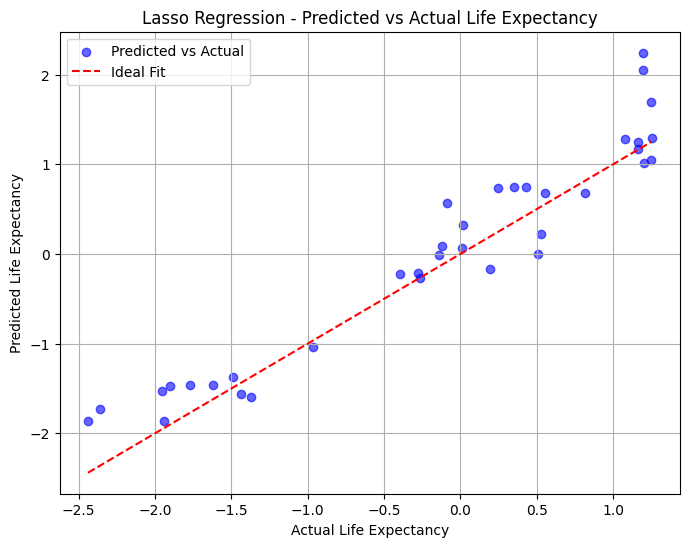

In [14]:
y_pred_lasso = best_lasso.predict(X_test)

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lasso, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Lasso Regression - Predicted vs Actual Life Expectancy')
plt.legend()
plt.grid(True)
plt.show()

2. **Random Forest Regressor Model**

In [15]:
# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=300, random_state=1, n_jobs=-1)

# Train the model
model_res = rf.fit(X_train, y_train)

# Make predictions
y_pred = model_res.predict(X_test)

# Evaluate the model

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-Squared (R²): {r2}")


Mean Squared Error (MSE): 0.1479658628287132
Root Mean Squared Error (RMSE): 0.38466331099899975
R-Squared (R²): 0.892729388911853


The results for Lasso Regression Model to compare:
1. Mean Squared Error (MSE): 0.14243053164725283
2. Root Mean Squared Error (RMSE): 0.3773996974657675
3. R-Squared (R²): 0.8967423304583629

It can be concluded that although the difference is not significant, the Lasso Regressor seems to model the data slightly better. The difference is so little that the performnace can be concluded to be similar.

**Hyperparameter Tuning Using RandomizedSearchCV**

In [16]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 500],  # Number of trees
    'max_depth': [10, 20, 30, None],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Min samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Min samples in a leaf node
}

# Initialize the model
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# Perform Randomized Search
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=20,  # Number of different combinations to try
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model
rf_random.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", rf_random.best_params_)



Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}


In [17]:
# Train the model with the best parameters
best_rf = RandomForestRegressor(n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_depth=30, random_state=42)
best_rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = best_rf.predict(X_test)

# Evaluate performance

mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)

print(f"Tuned Random Forest - MSE: {mse}")
print(f"Tuned Random Forest - RMSE: {rmse}")
print(f"Tuned Random Forest - R²: {r2}")

Tuned Random Forest - MSE: 0.15360297502755266
Tuned Random Forest - RMSE: 0.3919221542954068
Tuned Random Forest - R²: 0.8886426593190823


Random Forest without tinung results:
1. Mean Squared Error (MSE): 0.1479658628287132
2. Root Mean Squared Error (RMSE): 0.38466331099899975
3. R-Squared (R²): 0.892729388911853

Looks like tuning made the results worse. So the original Random Forest Regressor is what I would stick to.

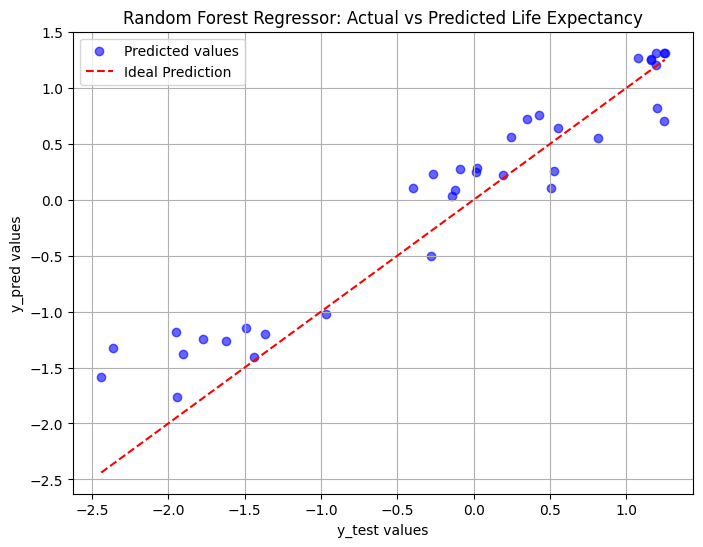

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label="Predicted values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Ideal Prediction")
plt.xlabel('y_test values')
plt.ylabel('y_pred values')
plt.title('Random Forest Regressor: Actual vs Predicted Life Expectancy')
plt.legend()
plt.grid(True)
plt.show()

**3. XGBOOST Model**

In [19]:
# Initialize XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=1)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mse_xgb ** 0.5
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print results
print(f"XGBoost Regression - MSE: {mse_xgb}")
print(f"XGBoost Regression - RMSE: {rmse_xgb}")
print(f"XGBoost Regression - R²: {r2_xgb}")

XGBoost Regression - MSE: 0.1643573573171305
XGBoost Regression - RMSE: 0.405410110033199
XGBoost Regression - R²: 0.8808460693622893


**Tuned Lasso Regression Results:**
1. MSE: 0.14243053164725283
2. RMSE: 0.3773996974657675
3.  R²: 0.8967423304583629

**Random Forest Model Results:**
1. Mean Squared Error (MSE): 0.1479658628287132
2. Root Mean Squared Error (RMSE): 0.38466331099899975
3. R-Squared (R²): 0.892729388911853

XGBOOST seems to not have improved the modeling performance in comparison with the above two models.

**XGBOOST HYPERPARAMETER TUNING**

In [20]:
# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}



**GRID SEARCH**

In [21]:
# Initialize XGBoost Regressor
xgb = XGBRegressor(random_state=1)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.8}


In [25]:
# Train XGBoost with best found parameters
xgb_best = XGBRegressor(**best_params, random_state=1)
xgb_best.fit(X_train, y_train)

# Make predictions
y_pred_xgb_best = xgb_best.predict(X_test)

# Evaluate the tuned model
mse_xgb_best = mean_squared_error(y_test, y_pred_xgb_best)
rmse_xgb_best = mse_xgb_best ** 0.5
r2_xgb_best = r2_score(y_test, y_pred_xgb_best)

# Print results
print(f"Tuned XGBoost - MSE: {mse_xgb_best}")
print(f"Tuned XGBoost - RMSE: {rmse_xgb_best}")
print(f"Tuned XGBoost - R²: {r2_xgb_best}")

Tuned XGBoost - MSE: 0.1465327639342685
Tuned XGBoost - RMSE: 0.3827959821292127
Tuned XGBoost - R²: 0.893768340675577


**CONCLUSION:**
1. **Lasso Regression** performed the best overall, having the lowest MSE & RMSE and the highest R² score (0.8967).
2. **XGBoost** is the second best, with slightly worse performance than Lasso but it is a very close second.
3. **Random Forest** had the weakest performance among the three, with the highest MSE and lowest R².


Although the performance of Lasso Regression is the best, but it is worth nothing that the three model performances are closely comparable.
